### This notebook explains the use of fast fourier transform to separate out noisy frequencies in a signal

### Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft
from scipy.fftpack import fftfreq
import pandas as pd
from scipy import signal as sig
from scipy.fftpack import irfft

### Generating a sample signal, providing the sample rate, frequency to be generated along with duration, and passing it to a sine function to make it oscillate at that frequency

In [2]:
SAMPLE_RATE = 44100 # number of samples to be collected per second i.e this is equal to 20000 Hz
DURATION = 15 # duration of the signal, here it will last for 15 seconds
freq = 2 # generate a 2 hz sine wave from a 20000 Hz signal lasting for 15 seconds

In [3]:
def generate_sine_wave(freq,duration,sample_rate):
    x = np.linspace(0,duration,sample_rate*duration)
    frequency = x*freq
    y = np.sin((2*np.pi)*frequency)
    plt.figure(figsize=(15,5))
    plt.plot(frequency,y)
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency')
    plt.show()
    return frequency,y

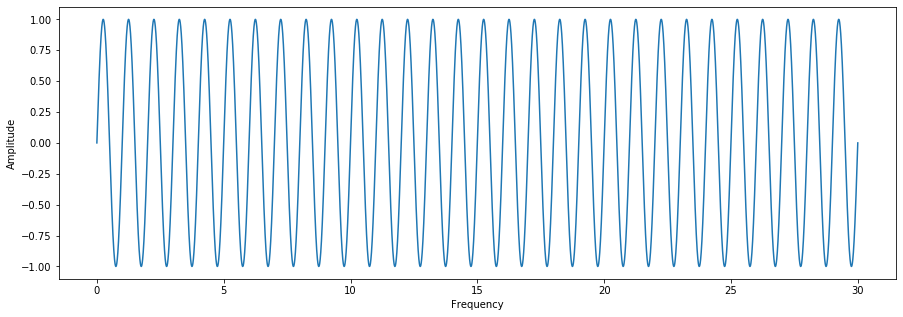

In [4]:
frequency,y=generate_sine_wave(freq,DURATION,SAMPLE_RATE)

### Generating a signal containing true signal (400 Hz) & noisy signal (4000 Hz)

### Multiplying noisy signal by 0.2 to reduce magnitude of signal

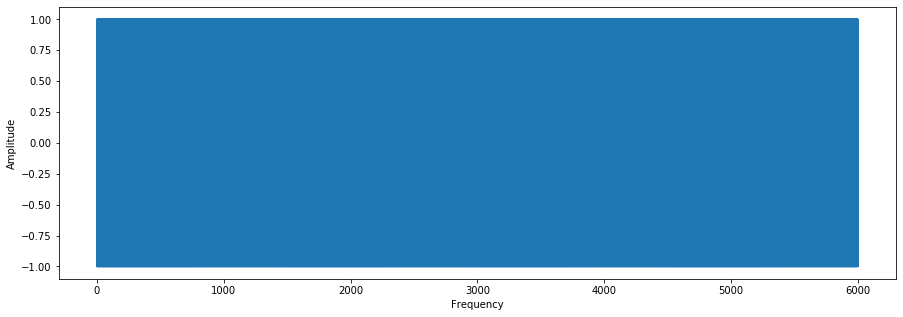

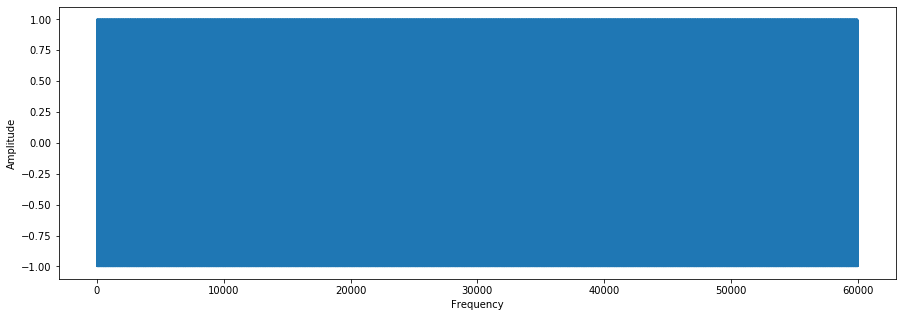

In [5]:
_,nice_signal = generate_sine_wave(400,DURATION,SAMPLE_RATE)
_,noise_signal = generate_sine_wave(4000,DURATION,SAMPLE_RATE)
noise_signal = 0.2*noise_signal

### Adding the two signals to include noise, and normalizing it and rounding it off to a 16 bit number

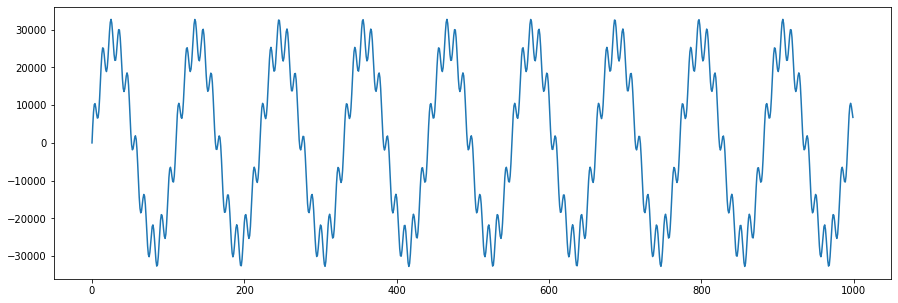

In [6]:
mixed_tone = nice_signal+noise_signal
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.figure(figsize=(15,5))
plt.plot(normalized_tone[:1000])
plt.show()

### Generating Power and frequency of the signal and plotting a power spectrum to identify the frequencies and power associated with them

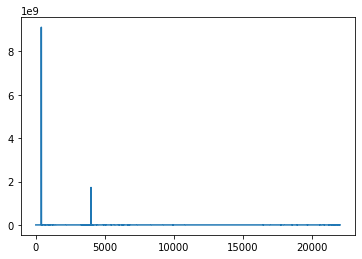

In [8]:
from scipy.fftpack import rfft, rfftfreq

# Note the extra 'r' at the front
fft_output = rfft(normalized_tone)
power = np.abs(fft_output)
freq = rfftfreq(len(normalized_tone), 1 / SAMPLE_RATE)

plt.plot(freq, power)
plt.show()

### Frequency of 400 Hz has a higher power, hence finding peaks in amplitude by filtering frequencies lesser than or equal to 400

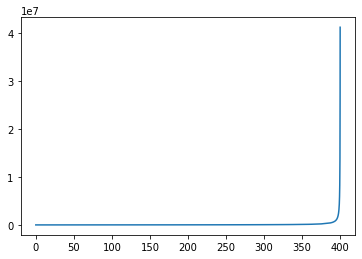

In [9]:
peaks = sig.find_peaks(power[freq<=400])[0]
peak_freq =  freq[peaks]
peak_power = power[peaks]
plt.plot(peak_freq, peak_power)


### Creating a dataframe and sorting values w.r.t amplitude in descending order

In [10]:
output = pd.DataFrame()
output['index'] = peaks
output['frequency'] = peak_freq
output['amplitude'] = peak_power
output['fft'] = fft_output[peaks]
output = output.sort_values('amplitude', ascending=False)

output

,index,frequency,amplitude,fft
5997,11996,399.866667,4.114679e+07,-4.114679e+07
5996,11994,399.800000,2.747021e+07,-2.747021e+07
5995,11992,399.733333,2.061752e+07,-2.061752e+07
5994,11990,399.666667,1.649953e+07,-1.649953e+07
5993,11988,399.600000,1.375318e+07,-1.375318e+07
...,...,...,...,...
54,110,3.666667,3.916291e+01,-3.916291e+01
94,190,6.333333,3.266973e+01,-3.266973e+01
11,24,0.800000,1.333823e+01,-1.333823e+01
67,136,4.533333,7.264574e+00,-7.264574e+00


### Performing inverse fast fourier transform to obtain the original denoised signal

In [11]:
filtered_fft_output = np.array([f if i == 3996 else 0 for i, f in enumerate(fft_output)])
filtered_sig = irfft(filtered_fft_output)

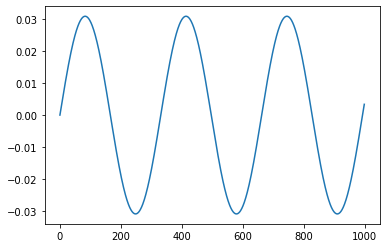

In [14]:
plt.plot(filtered_sig[:1000])
plt.show()